### Notas de aula de Mecânica Quântica <br> Autor: Jonas Maziero

In [26]:
%run init.ipynb

/var/folders/c1/_8nwnwc923z5dw_vmskv8p5r0000gn/T/ipykernel_64518/1833980435.py:15: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, clear_output
/var/folders/c1/_8nwnwc923z5dw_vmskv8p5r0000gn/T/ipykernel_64518/1833980435.py:15: DeprecationWarning: Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, clear_output


# Método Variacional
Outro método bastante usado para obter soluções aproximadas de sistemas quânticos é o método variacional. A seguir veremos uma versão simples deste método e sua aplicação a alguns sistemas interessantes.

## Teorema variacional (estado fundamental)
Seja $H$ um hamiltoniano com espectro discreto de autovalores e seja 
$$H|\psi_{n}\rangle = E_{n}|\psi_{n}\rangle,\ \text{com } n = 0,1,2,\cdots,$$
tal que
$$E_{n+1}\ge E_{n}.$$
Ou seja, ordenamos os autovaores em ordem não crescente. Seque que
$$\langle H\rangle_{\phi} \ge E_{0}\ \forall \phi \text{ com } ||\phi||=1.$$

### Prova
A prova deste teorema é uma aplicação simples do fato de que o valor médio de uma variável aleatória é um número que está entre seus valores mínimo e máximo. No entanto, vamos repetir aqui essa prova:
\begin{align}
\langle H\rangle_{\phi} & = \sum_{n}E_{n}Pr(E_{n}|\phi) = \sum_{n}E_{n}|\langle\psi_{n}|\phi\rangle|^{2} \\
& \le \sum_{n}E_{0}|\langle\psi_{n}|\phi\rangle|^{2} = E_{0}\sum_{n}|\langle\psi_{n}|\phi\rangle|^{2} = E_{0}\sum_{n}Pr(E_{n}|\phi) = E_{0}(1) \\
& = E_{0},
\end{align}
em que usamos $E_{n}\ge E_{0}$, a regra de Born e a normalização para as probabilidades. <br>
$\square$

#### Exemplo
Vamos considerar o oscilador harmônico quântico unidimensional (OHQ1D):
$$H = \frac{P^{2}}{2m}+\frac{m\omega^{2}X^{2}}{2}.$$
Uma __função de onda teste__ natural, para começar, é uma gaussiana
$$\phi(x) = Ae^{-bx^{2}}.$$
Normalizando,
\begin{align}
& \int_{-\infty}^{\infty}|\phi(x)|^{2}dx = |A|^{2}\int_{-\infty}^{\infty}e^{-2bx^{2}}dx = |A|^{2}\sqrt{\frac{\pi}{2b}} \\
& \therefore\ A = \big(2b/\pi\big)^{1/4},
\end{align}
teremos que
$$\phi(x) = \big(2b/\pi\big)^{1/4}e^{-bx^{2}} = \phi(x,b).$$
Podemos chamar $b$ de __parâmetro variacional__.

Com isso, vem que
\begin{align}
\langle H\rangle_{\phi} & = \frac{1}{2m}\langle P^{2}\rangle_{\phi} + \frac{m\omega^{2}}{2}\langle X^{2}\rangle_{\phi} \\
& = -\hbar^{2}\frac{\sqrt{2b/\pi}}{2m}\int_{-\infty}^{+\infty}dx e^{-bx^{2}}\partial_{xx}e^{-bx^{2}} + \frac{\sqrt{2b/\pi}m\omega^{2}}{2}\int_{-\infty}^{+\infty}dx  x^{2}e^{-2bx^{2}} \\
& = -\hbar^{2}\frac{\sqrt{2b/\pi}}{2m}\Big(4b^{2}\int_{-\infty}^{+\infty}dx x^{2}e^{-bx^{2}} - 2b\int_{-\infty}^{+\infty}dx e^{-2bx^{2}}\Big) + \frac{\sqrt{2b/\pi}m\omega^{2}}{2}\frac{\sqrt{2\pi}}{2^{3}b^{3/2}} \\
& = -\hbar^{2}\frac{\sqrt{2b/\pi}}{2m}\Big(4b^{2}\frac{\sqrt{2\pi}}{2^{3}b^{3/2}} - 2b\sqrt{\pi/2b}\Big) + \frac{m\omega^{2}}{2^{3}b} \\
& = -\hbar^{2}\frac{\sqrt{2b/\pi}}{2m}\Big(-\frac{\sqrt{2\pi b}}{2}\Big) + \frac{m\omega^{2}}{2^{3}b} \\
& = \frac{b\hbar^{2}}{2m} + \frac{m\omega^{2}}{2^{3}b}.
\end{align}

In [52]:
b = symbols('b', positive=True); x = symbols('x')
diff(exp(-b*x**2),x,2)

In [44]:
integrate(exp(-b*x**2),(x,-oo,+oo))

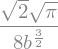

In [45]:
integrate(x**2*exp(-2*b*x**2),(x,-oo,+oo))

Com isso, obtemos o $b$ que nos retorna um valor extremo de $\langle H\rangle_{\phi}$ usando
\begin{align}
& 0 = \partial_{b}\langle H\rangle_{\phi} = \frac{\partial}{\partial b}\Big(\frac{b\hbar^{2}}{2m} + \frac{m\omega^{2}}{2^{3}b}\Big) = \frac{\hbar^{2}}{2m} - \frac{m\omega^{2}}{2^{3}b^{2}} \\
& \therefore\ b_{opt} = \frac{m\omega}{2\hbar}.
\end{align}

Assim temos uma estimativa para a energia do estado fundamental:
\begin{align}
\langle H\rangle_{\phi(b_{opt})} & = \frac{b_{opt}\hbar^{2}}{2m} + \frac{m\omega^{2}}{2^{3}b_{opt}}  =  \frac{m\omega}{2\hbar}\frac{\hbar^{2}}{2m} +  \frac{2\hbar}{m\omega}\frac{m\omega^{2}}{2^{3}} \\
&  =  \frac{m\omega}{2\hbar}\frac{\hbar^{2}}{2m} +  \frac{2\hbar}{m\omega}\frac{m\omega^{2}}{2^{3}} = \hbar\omega(1/2),
\end{align}
que coincide com a energia do estado fundamental do OHQ1D. Isso ocorreu porquê escolhemos uma função de onda teste que tem a mesma forma da autofunção correspondente ao estado fundamental do OHQ1D.

## Teorema variacional (1º estado excitado)
Seja $H$ um hamiltoniano com espectro discreto de autovalores e seja $H|\psi_{n}\rangle = E_{n}|\psi_{n}\rangle,\ \text{com } n = 0,1,2,\cdots,$ tal que $E_{n+1}\ge E_{n}$, e seja o __vetor de estado teste__ $|\phi\rangle$ ortogonal ao autovetor correspondente à menor energia, $|\psi_{0}\rangle$ (ou ao subespaço correspondente a $E_{0}$, se houver degenerescência), i.e., 
$$\langle\phi|\psi_{0}\rangle :=0.$$
Seque que
$$\langle H\rangle_{\phi} \ge E_{1}.$$

### Prova
Neste caso, teremos que:
\begin{align}
\langle H\rangle_{\phi} & = \sum_{n}E_{n}Pr(E_{n}|\phi) = \sum_{n}E_{n}|\langle\psi_{n}|\phi\rangle|^{2}  \\
& = E_{0}|\langle\psi_{0}|\phi\rangle|^{2} + \sum_{n>0}E_{n}|\langle\psi_{n}|\phi\rangle|^{2}  = E_{0}0 + \sum_{n>0}E_{n}|\langle\psi_{n}|\phi\rangle|^{2} \\
& \ge \sum_{n>0}E_{1}|\langle\psi_{n}|\phi\rangle|^{2} = E_{1}\sum_{n>0}|\langle\psi_{n}|\phi\rangle|^{2}  = E_{1}\Big(|\langle\psi_{0}|\phi\rangle|^{2}+\sum_{n>0}|\langle\psi_{n}|\phi\rangle|^{2}\Big) \\
& = E_{1}\sum_{n}Pr(E_{n}|\phi) = E_{1}(1) \\
& = E_{1}.
\end{align}
$\square$

OBS. Esse teorema pode ser estendido para estados com maior energia (2º, 3º, ... estados excitados). A ideia é a mesma. Por exemplo, para o 2º estado excitado, se usarmos um vetor de estado teste $|\phi\rangle$ ortogonal aos autovetores do estado fundamental, $|\psi_{0}\rangle$, e do 1º estados excitado, $|\psi_{1}\rangle$, teremos que $\langle H\rangle_{\phi}\ge E_{2}.$ 

#### Exemplo
Vamos considerar novamente o OHQ1D. Mas desta vez queremos estimar a energia do 1º estado excitado. Para isso, devemos utilizar uma função teste ortogonal à função de onda do estado fundamental. Como "não conhecemos" a solução exata, usamos uma função teste que seja ortogonal à função teste ótima obtida quando da estimativa da energia do estado fundamental. Podemos usar
$$\phi_{1}(x) = Axe^{-bx^{2}} = \sqrt{\frac{2^{3}b^{3/2}}{\sqrt{2\pi}}}xe^{-bx^{2}}.$$
Pode-se verificar que
$$\langle\phi_{1}|\phi\rangle = \int_{-\infty}^{+\infty}dx\phi_{1}^{*}(x)\phi(x)\propto \int_{-\infty}^{+\infty}xe^{-2bx^{2}}dx=0.$$

In [46]:
integrate(x*exp(-2*b*x**2),(x,-oo,+oo))

Neste caso, teremos
\begin{align}
\langle H\rangle_{\phi_{1}}  & = \frac{1}{2m}\langle P^{2}\rangle_{\phi_{1}} + \frac{m\omega^{2}}{2}\langle X^{2}\rangle_{\phi_{1}} \\
& = -\frac{\hbar^{2}}{2m}\int_{-\infty}^{+\infty}Axe^{-bx^{2}}\partial_{xx}Axe^{-bx^{2}}dx + \frac{m\omega^{2}}{2}\int_{-\infty}^{+\infty}x^{2}A^{2}x^{2}e^{-2bx^{2}} \\
& = -\frac{A^{2}\hbar^{2}}{2m}\int_{-\infty}^{+\infty}xe^{-bx^{2}}\big(4b^{2}x^{3}-6bx\big)e^{-bx^{2}}dx + \frac{A^{2}m\omega^{2}}{2}\int_{-\infty}^{+\infty}x^{4}e^{-2bx^{2}} \\
& = -\frac{A^{2}\hbar^{2}}{2m}\Big(4b^{2}\int_{-\infty}^{+\infty}x^{4}e^{-2bx^{2}}dx -6b\int_{-\infty}^{+\infty}x^{2}e^{-2bx^{2}}dx\Big) + \frac{A^{2}m\omega^{2}}{2}\frac{3\sqrt{2\pi}}{32b^{5/2}} \\
& = -\frac{A^{2}\hbar^{2}}{2m}\Big(4b^{2}\frac{3\sqrt{2\pi}}{32b^{5/2}} -6b\frac{\sqrt{2\pi}}{8b^{3/2}}\Big) + \frac{A^{2}m\omega^{2}}{2}\frac{3\sqrt{2\pi}}{32b^{5/2}} \\
& = -\frac{2^{3}b^{3/2}}{\sqrt{2\pi}}\frac{\hbar^{2}}{2m}\Big(4b^{2}\frac{3\sqrt{2\pi}}{32b^{5/2}} -6b\frac{\sqrt{2\pi}}{8b^{3/2}}\Big) + \frac{2^{3}b^{3/2}}{\sqrt{2\pi}}\frac{m\omega^{2}}{2}\frac{3\sqrt{2\pi}}{32b^{5/2}} \\
& = \frac{3b\hbar^{2}}{2m} + \frac{3m\omega^{2}}{8b}.
\end{align}

In [47]:
diff(x*exp(-b*x**2),x,2)

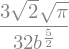

In [48]:
integrate(x**4*exp(-2*b*x**2), (x,-oo,+oo))

Para obter o valor mínimo, fazemos
\begin{align}
& 0 = \partial_{b}\langle H\rangle_{\phi_{1}} = \frac{\partial}{\partial b}\Big(\ \frac{3b\hbar^{2}}{2m} + \frac{3m\omega^{2}}{8b}\Big) =  \frac{3\hbar^{2}}{2m} - \frac{3m\omega^{2}}{8b^{2}} \\
& \therefore\ b_{opt} = \frac{m\omega}{2\hbar}.
\end{align}

Assim, a estimativa varicional para a energia do 1º estado excitado do OHQ1D é
\begin{align}
\langle H\rangle_{\phi_{1}(b_{opt}} & = \frac{3b_{opt}\hbar^{2}}{2m} + \frac{3m\omega^{2}}{8b_{opt}}  =  \frac{m\omega}{2\hbar}\frac{3\hbar^{2}}{2m} +  \frac{2\hbar}{m\omega}\frac{3m\omega^{2}}{8} \\
& = \hbar\omega(3/2) = \hbar\omega(1+1/2),
\end{align}
que também coincide com o resultado exato, também porquê usamos uma função de onda teste com a mesma forma da função de onda exata.

## Estimativa do erro
Vamos começar escrevendo o vetor de estado teste como
$$|\phi\rangle = \sum_{n}c_{n}|\psi_{n}\rangle \equiv \sum_{n}\langle\psi_{n}|\phi\rangle|\psi_{n}\rangle.$$
Se o estado teste é igual ao autovetor correspondente ao estado fundamental, então $|c_{0}|=1$ (lembre que $|c_{n}|\le 1$ e $\sum_{n}|c_{n}|^{2}=1$). Quanto mais longe estamos do estado exato, menor será $|c_{0}|\le 1$. Por conseguinte, podemos quantificar o quão errada está nossa função de onda teste em relação ao autovetor do estado fundamental usando
$$\epsilon(\phi) := 1-|c_{0}|^{2}.$$

Usando que 
$$Pr(E_{n}|\phi) = |\langle\psi_{n}|\phi\rangle|^{2} = |c_{n}|^{2},$$

teremos que (lembre que $E_{0}\le E_{1}\le E_{2}\le\cdots$)
\begin{align}
\langle H\rangle_{\phi}-E_{0} & = \sum_{n}E_{n}Pr(E_{n}|\phi)-E_{0} = \sum_{n}E_{n}|c_{n}|^{2}-E_{0} \\
& = E_{0}|c_{0}|^{2} + \sum_{n>0}E_{n}|c_{n}|^{2} - E_{0} \\
& \ge E_{0}|c_{0}|^{2} + \sum_{n>0}|c_{n}|^{2}E_{1} - E_{0} \\
& = -E_{0}(1-|c_{0}|^{2}) + (1-|c_{0}|^{2})E_{1} \\
& = (E_{1}-E_{0})(1-|c_{0}|^{2}) \\
& = (E_{1}-E_{0})\epsilon(\phi),
\end{align}
em que usamos que
$$\sum_{n}|c_{n}|^{2} = \sum_{n}Pr(E_{n}|\phi)=1 = |c_{0}|^{2}+\sum_{n>0}|c_{n}|^{2}.$$

Então
$$\epsilon(\phi) \le \frac{\langle H\rangle_{\phi}-E_{0}}{E_{1}-E_{0}}.$$
Esse limite superior pode ser calculado se conhecemos $E_{0}$ e $E_{1}$ de experimentos, ou seja, que queremos obter funções de onda que descrevam um sistema com espectro de autovalores conhecido do experimento.

#### Exemplo
Fazendo $\hbar=1$, $\omega=1$ e $m=1$, mostramos na figura abaixo o limite superior para o erro do vetor de estado teste em função do parâmetro livre $b$ para estimativa da energia do estado fundamental do OHQ1D.

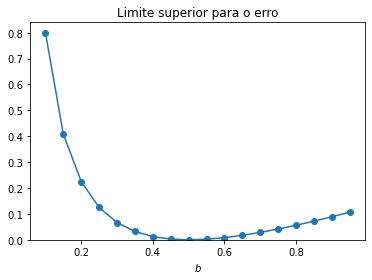

In [62]:
# hb = w = m = 1
x = np.arange(0.1,1,0.05); ub = (x/2 + 1/(8*x) - 1/2)/(1)
plt.plot(x,ub,'-o'); plt.ylim(0,)
plt.xlabel(r'$b$'); plt.title('Limite superior para o erro'); plt.show()

## Limites variacionais inferiores e superiores
### Teorema
Seja $|\phi\rangle$ um vetor de estado teste. Existe algum autovalor $E_{k}$ do hamiltoniano $H$ para o qual a seguinte desigualdade é satisfeita:
$$\langle H\rangle_{\phi}-\sqrt{Var(H)_{\phi}} \le  E_{k} \le \langle H\rangle_{\phi}+\sqrt{Var(H)_{\phi}}.$$

#### Prova
Começamos considerando a variância do hamiltoniano para o estado teste:
\begin{align}
Var(H)_{\phi} & = \big\langle\big(H-\langle H\rangle_{\phi}\mathbb{I}\big)^{2}\big\rangle \\
& = \sum_{n}\big(E_{n}-\langle H\rangle_{\phi}\big)^{2}Pr(E_{n}|\phi).
\end{align}

Para uma dada função de onda teste $\phi$, existe algum autovalor $E_{k}$ que é tão próximo do valor médio $\langle H\rangle_{\phi}$ quanto qualquer outro autovalor. Ou seja, consideremos a __condição__:
$$\big(E_{k}-\langle H\rangle_{\phi}\big)^{2} \le \big(E_{n}-\langle H\rangle_{\phi}\big)^{2}\ \forall n.$$

Com isso, vem que
\begin{align}
Var(H)_{\phi} & \ge \sum_{n}\big(E_{k}-\langle H\rangle_{\phi}\big)^{2}Pr(E_{n}|\phi) = \big(E_{k}-\langle H\rangle_{\phi}\big)^{2}\sum_{n}Pr(E_{n}|\phi) \\
& = \big(E_{k}-\langle H\rangle_{\phi}\big)^{2}.
\end{align}
Então
$$\sqrt{Var(H)_{\phi}} \ge |E_{k}-\langle H\rangle_{\phi}|.$$
Teremos assim os seguintes casos
\begin{align}
E_{k}\ge\langle H\rangle_{\phi} & \therefore\ \sqrt{Var(H)_{\phi}} \ge E_{k}-\langle H\rangle_{\phi} \ \therefore\ E_{k} \le \langle H\rangle_{\phi}+\sqrt{Var(H)_{\phi}}, \\
E_{k}<\langle H\rangle_{\phi} & \therefore\ \sqrt{Var(H)_{\phi}} \ge -E_{k}+\langle H\rangle_{\phi} \ \therefore\ E_{k} \ge \langle H\rangle_{\phi}-\sqrt{Var(H)_{\phi}}.
\end{align}
Com isso segue a seguinte desigualdade dupla:
$$\langle H\rangle_{\phi}-\sqrt{Var(H)_{\phi}} \le  E_{k} \le \langle H\rangle_{\phi}+\sqrt{Var(H)_{\phi}}.$$
$\square$

Note que, dada uma certa função de onda teste $\phi$, essas desigualdades valem somente para o autovalor $E_{k}$ mais próximo de $\langle H\rangle_{\phi}$. Isso é, de certo modo, lógico pois se a variância de $H$ é $0$ isso implica que $\phi$ é autovetor de $H$, e neste caso os limites inferior e superior acima coincidem. 

Por outro lado, podemos usar esses limites inferior e superior para quantificar quanto um certo vetor de estado teste $|\phi\rangle$ está de ser um certo autovetor $|\psi_{k}\rangle$ de $H$.

#### Exemplo
Vamos considerar os cálculos feitos para estimar a energia do estado fundamental do OHQ1D, para o qual temos $\phi(x,b)=(2b/\pi)^{1/4}e^{-bx^{2}}$ e $\langle H\rangle_{\phi} = b\hbar^{2}/2m + m\omega^{2}/8b$. Para calcular a variância, precisamos ainda obter
\begin{align}
\langle H^{2}\rangle_{\phi} & = \langle\phi|H^{2}|\phi\rangle = \langle\phi|\Big(\frac{P^{2}}{2m}+\frac{m\omega^{2}}{2}X^{2}\Big)^{2}|\phi\rangle \\
& = \frac{1}{4m^{2}}\langle\phi|P^{4}|\phi\rangle + \frac{m^{2}\omega^{4}}{4}\langle\phi|X^{4}|\phi\rangle + \frac{\omega^{2}}{4}\langle\phi|\big(P^{2}X^{2}+X^{2}P^{2}\big)|\phi\rangle.
\end{align}


Passemos para o cálculo desses valores médios. Começamos com
\begin{align}
\langle\phi|P^{4}|\phi\rangle & = \int_{-\infty}^{+\infty}dx\phi^{*}\big(-i\hbar\partial_{x}\big)^{4}\phi  = \hbar^{4}\int_{-\infty}^{+\infty}dx\phi^{*}\partial_{xxxx}\phi \\
& = \hbar^{4}\sqrt{\frac{2b}{\pi}}\int_{-\infty}^{+\infty}dx 4b^{2}\big(4b^{2}x^{4}-12bx^{2}+3\big)e^{-2bx^{2}} \\
& = \hbar^{4}\sqrt{\frac{2b}{\pi}}4b^{2}\Big(4b^{2}\frac{3\sqrt{2\pi}}{32b^{5/2}}-12b\frac{\sqrt{2\pi}}{8b^{3/2}}+3\sqrt{\frac{\pi}{2b}}\Big) \\
& = 3b^{2}\hbar^{4}.
\end{align}

In [53]:
diff(exp(-b*x**2),x,4)

In [54]:
hb = symbols('hbar')
simplify(hb**4*sqrt(2*b/pi)*4*b**2*( (4*b**2*3*sqrt(2*pi))/(32*b**(5/2))  
         - (12*b*sqrt(2*pi))/(8*b**(3/2)) + (3*sqrt(pi))/(sqrt(2*b))))

Seguindo, consideramos
\begin{align}
\langle\phi|X^{4}|\phi\rangle & = \int_{-\infty}^{+\infty}x^{4}|\phi|^{2}dx = \sqrt{\frac{2b}{\pi}}\int_{-\infty}^{+\infty}x^{4}e^{-2bx^{2}}dx \\
& = \sqrt{\frac{2b}{\pi}}\frac{3\sqrt{2\pi}}{32b^{5/2}} = \frac{3}{16b^{3/2}}.
\end{align}

Já
\begin{align}
\langle\phi|X^{2}P^{2}|\phi\rangle & = \int_{-\infty}^{+\infty}\langle\phi|X^{2}P|x\rangle\langle x|P|\phi\rangle = \int_{-\infty}^{+\infty}dx\langle\phi|X^{2}P|x\rangle\frac{\hbar}{i}\partial_{x}\langle x|\phi\rangle \\
& = \int_{-\infty}^{+\infty}dx\int_{-\infty}^{+\infty}dx'\langle\phi|X^{2}|x'\rangle\langle x'|P\big(\big(-i\hbar\partial_{x}\phi(x)\big)|x\rangle\big) \\
& = \int_{-\infty}^{+\infty}dx\int_{-\infty}^{+\infty}dx'\langle\phi|x'^{2}|x'\rangle\frac{\hbar}{i}\partial_{x'}\big(\big(-i\hbar\partial_{x}\phi(x)\big)\langle x'|x\rangle\big) \\
& = \int_{-\infty}^{+\infty}dx\int_{-\infty}^{+\infty}dx'\phi(x')^{*}x'^{2}\frac{\hbar}{i}\partial_{x'}\big(\big(-i\hbar\partial_{x}\phi(x)\big)\delta(x'-x)\big) \\
& = \int_{-\infty}^{+\infty}dx\phi(x)^{*}x^{2}\big(-i\hbar\partial_{x}\big)^{2}\phi(x) \\
& = -\hbar^{2}\int_{-\infty}^{+\infty}dx\phi(x)^{*}x^{2}\partial_{xx}\phi(x) \\
& = -\hbar^{2}\sqrt{\frac{2b}{\pi}}\int_{-\infty}^{+\infty} x^{2}2bx\big(2bx^{2}-3\big)e^{-2bx^{2}}dx \\
& = 0.
\end{align}

Pode-se mostrar também que
\begin{align}
\langle\phi|P^{2}X^{2}|\phi\rangle & = \int_{-\infty}^{\infty} dx\phi(x)^{*}\big(-i\hbar\partial_{x}\big)^{2}\big(x^{2}\phi(x)\big) \\
& = -\hbar^{2}\int_{-\infty}^{\infty} dx\phi(x)^{*}\partial_{xx}\big(x^{2}\phi(x)\big) \\
& = -\hbar^{2}\sqrt{\frac{2b}{\pi}}\int_{-\infty}^{\infty} dxe^{-bx^{2}}\partial_{xx}\big(x^{2}e^{-bx^{2}}\big) \\
& = -\hbar^{2}\sqrt{\frac{2b}{\pi}}\Big(4b^{2}\int_{-\infty}^{\infty}dxx^{4}e^{-2bx^{2}} - 10b\int_{-\infty}^{\infty}dxx^{2}e^{-2bx^{2}}+2\int_{-\infty}^{\infty}dxe^{-2bx^{2}} \Big) \\
& = -\frac{9\hbar^{2}}{4}.
\end{align}

In [57]:
simplify(diff(x**2*exp(-b*x**2),x,2))

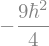

In [59]:
simplify( -hb**2*sqrt(2*b/pi)*(4*b**2*integrate(x**4*exp(-2*b*x**2),(x,-oo,oo)) 
                              -10*b*integrate(x**2*exp(-2*b*x**2),(x,-oo,oo))
                              +4*integrate(exp(-2*b*x**2),(x,-oo,oo))) )

Obtemos assim
\begin{align}
\langle H^{2}\rangle_{\phi} & = \frac{1}{4m^{2}}3b^{2}\hbar^{4} + \frac{m^{2}\omega^{4}}{4}\frac{3}{16b^{3/2}} + \frac{\omega^{2}}{4}\Big(-\frac{9\hbar^{2}}{4}+0\Big).
\end{align}
Com isso podemos calcular a variância e os limites inferior e superior, que estão mostrados na figura abaixo.

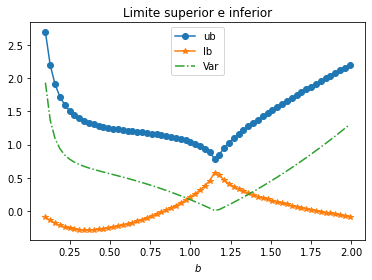

In [76]:
m = 1; w = 1; hbb = 1
b = np.arange(0.1,2,0.03); 
H2m = (3*b**2*hbb**4)/(4*m**2) + (3*m**2*w**4)/(64*b*(3/2)) - (9*w**2*hbb**2)/(16)
Hm = (b*hbb**2)/(2*m) + (m*w**2)/(8*b)
Var = abs(H2m - Hm**2)#; print(Var)
ub = Hm + np.sqrt(Var); lb = Hm - np.sqrt(Var)
plt.plot(b, ub,'-o',label='ub'); plt.plot(b, lb,'-*',label='lb'); plt.plot(b, Var,'-.',label='Var')
plt.legend()
plt.xlabel(r'$b$'); plt.title('Limite superior e inferior')
plt.show()

## O átomo de Hélio
O átomo de Hélio é constituído por 2 elétrons, 2 prótons e 2 nêutrons. Considerando somente energia cinética não relativística e energia potencial devido à interação coulombiana, e considerando o núcleo parado, o hamiltoniano deste átomo pode ser escrito como segue:
$$H = -\frac{\hbar^{2}}{2m_{e}}\big(\nabla_{1}^{2}+\nabla_{2}^{2}\big)-ke^{2}\Big(\frac{2}{r_{1}}+\frac{2}{r_{2}}-\frac{1}{||\vec{r}_{1}-\vec{r}_{2}||}\Big). $$
Nesta equação o índice $s=1,2$ refere-se ao elétron $1,2$.

Nosso problema é calcular teoricamente a energia do estado fundamental deste átomo. Essa energia é igual à energia necessária para arrancar os 2 elétrons do átomo, e o valor dessa energia é conhecido experimentalmente:
$$E_{0}^{exp} \approx -78.935\text{ eV}.$$

A dificuldade em se resolver este problema se deve ao termo de repulsão elétron-elétron:
$$U_{ee} = \frac{ke^{2}}{||\vec{r}_{1}-\vec{r}_{2}||}.$$
Se ignoramos esse termo, o hamiltoniano fica escrito como
$$H_{i} = -\frac{\hbar^{2}}{2m_{e}}\nabla_{1}^{2}-\frac{2ke^{2}}{r_{1}}-\frac{\hbar^{2}}{2m_{e}}\nabla_{2}^{2}-\frac{2ke^{2}}{r_{2}} = H_{1}^{h}+H_{2}^{h},$$
que equivale à soma dos hamiltonianos de 2 átomos hidrogenóides independentes com número atômico $Z=2$. Seja $\psi_{nlm_{l}}^{(j)}$ a autofunção de $H_{j}^{h}$. Teremos assim que
$$H_{i}\psi_{nlm_{l}}^{(1)}\psi_{n'l'm_{l}'}^{(2)} = \big(E_{n}^{(0)}+E_{n'}^{(0)}\big)\psi_{nlm_{l}}^{(1)}\psi_{n'l'm_{l}'}^{(2)},$$
com
$$E_{n}^{(0)} = -\frac{m_{e} Z^{2}k^{2}e^{4}}{2\hbar^{2}}\frac{1}{n^{2}} = Z^{2}\Big(-\frac{m_{e}k^{2}e^{4}}{2\hbar^{2}}\Big)\frac{1}{n^{2}} = Z^{2}\frac{E_{1}^{(0)}}{n^{2}},$$
em que usamos $E_{1}^{(0)} = -m_{e}k^{2}e^{4}/2\hbar^{2} = -ke^{2}/2a_{0}$. 
Com isso, para o estado fundamental teremos a seguinte aproximação para a energia (hamiltoniano de elétrons independentes):
$$E_{0}^{ei} = 2(2^{2})E_{1}^{(0)} \approx -108.85\text{ eV}.$$
Note, essa é só uma 1ª aproximação, sem uso do método variacional.

In [43]:
E10 = (-(me*k**2*e**4)/(2*hb**2))/e; E10, 2*2**2*(-(me*k**2*e**4)/(2*hb**2))/e

Para melhorar essa aproximação, ainda sem usar o método variacional, vamos usar como função de onda teste a autofunção de elétrons independentes:
$$\phi = \psi_{100}^{(1)}\psi_{100}^{(2)} = \frac{8}{\pi a_{0}^{3}}e^{-2(r_{1}+r_{2})/a_{0}},$$
em que usamos (https://github.com/jonasmaziero/mecanica_quantica_1900-1925/blob/master/16_hidrogenio.ipynb) $$\psi_{1,0,0}(r,\theta,\phi) = \left(\frac{Z}{\pi a_{0}}\right)^{3/2}e^{-Zr/a_{0}}.$$
Teremos assim que que 
$$\langle H\rangle_{\phi} = -108.85\text{ eV} + \langle U_{ee}\rangle,$$
em que
\begin{align}
\langle U_{ee}\rangle & = \iint d^{3}r_{1}d^{3}r_{2} U_{ee}|\phi|^{2} = ke^{2}\Big(\frac{8}{\pi a_{0}^{3}}\Big)^{2}\iint d^{3}r_{1}d^{3}r_{2} \frac{e^{-4(r_{1}+r_{2})/a_{0}}}{||\vec{r}_{1}-\vec{r}_{2}||} \\
&  = ke^{2}\Big(\frac{8}{\pi a_{0}^{3}}\Big)^{2}\int d^{3}r_{1}e^{-4r_{1}/a_{0}}\int d^{3}r_{2} \frac{e^{-4r_{2}/a_{0}}}{||\vec{r}_{1}-\vec{r}_{2}||}.
\end{align}

Usemos 
\begin{align}
||\vec{r}_{1}-\vec{r}_{2}|| & = \sqrt{(\vec{r}_{1}-\vec{r}_{2})\cdot(\vec{r}_{1}-\vec{r}_{2})} = \sqrt{r_{1}^{2}+r_{2}^{2}-2\vec{r}_{1}\cdot\vec{r}_{2}} \\
& = \sqrt{r_{1}^{2}+r_{2}^{2}-2r_{1}r_{2}\cos\theta_{2}},
\end{align}
em que $\theta_{2}$ é o ângulo entre $\vec{r}_{1}$ e $\vec{r}_{2}$, para fazer primeiro a integral sobre o elétron 2:
\begin{align}
\int d^{3}r_{2} \frac{e^{-4r_{2}/a_{0}}}{||\vec{r}_{1}-\vec{r}_{2}||} & = \int_{0}^{\infty}\int_{0}^{\pi}\int_{0}^{2\pi} r_{2}^{2}\sin\theta_{2}dr_{2}d\theta_{2}d\phi_{2} \frac{e^{-4r_{2}/a_{0}}}{\sqrt{r_{1}^{2}+r_{2}^{2}-2r_{1}r_{2}\cos\theta_{2}}} \\
& = 2\pi\int_{0}^{\infty}dr_{2}r_{2}^{2}e^{-4r_{2}/a_{0}}\int_{0}^{\pi}\frac{d\theta_{2}\sin\theta_{2}}{\sqrt{r_{1}^{2}+r_{2}^{2}-2r_{1}r_{2}\cos\theta_{2}}} \\
& = 2\pi\int_{0}^{\infty}dr_{2}r_{2}^{2}e^{-4r_{2}/a_{0}}\int u^{-1/2}\frac{du}{2r_{1}r_{2}} \\
& = \frac{\pi}{r_{1}}\int_{0}^{\infty}dr_{2}r_{2}e^{-4r_{2}/a_{0}}\Big(\frac{u^{1/2}}{1/2}\Big) \\
& = \frac{2\pi}{r_{1}}\int_{0}^{\infty}dr_{2}r_{2}e^{-4r_{2}/a_{0}}\Big[\sqrt{r_{1}^{2}+r_{2}^{2}-2r_{1}r_{2}\cos\theta_{2}}\Big]_{0}^{\pi} \\
& = \frac{2\pi}{r_{1}}\int_{0}^{\infty}dr_{2}r_{2}e^{-4r_{2}/a_{0}}\Big(\sqrt{r_{1}^{2}+r_{2}^{2}+2r_{1}r_{2}} - \sqrt{r_{1}^{2}+r_{2}^{2}-2r_{1}r_{2}}\Big) \\
& = \frac{2\pi}{r_{1}}\int_{0}^{\infty}dr_{2}r_{2}e^{-4r_{2}/a_{0}}\Big(\sqrt{(r_{1}+r_{2})^{2}} - \sqrt{(r_{1}-r_{2})^{2}}\Big) \\
& = \frac{2\pi}{r_{1}}\int_{0}^{\infty}dr_{2}r_{2}e^{-4r_{2}/a_{0}}\big(r_{1}+r_{2} - |r_{1}-r_{2}|\big) \\
& = \frac{2\pi}{r_{1}}\int_{0}^{\infty}dr_{2}r_{2}e^{-4r_{2}/a_{0}}\times\begin{cases} \big(2r_{2}\big) \text{ se } r_{1}\ge r_{2}, \\
\big(2r_{1}\big) \text{ se } r_{1}<r_{2},\end{cases} \\
& = \frac{4\pi}{r_{1}}\Big( \int_{0}^{r_{1}}dr_{2}r_{2}^{2}e^{-4r_{2}/a_{0}} + r_{1}\int_{r_{1}}^{\infty}dr_{2}r_{2}e^{-4r_{2}/a_{0}} \Big),
\end{align}
em que fizemos a mudança de variável $u = r_{1}^{2}+r_{2}^{2}-2r_{1}r_{2}\cos\theta_{2}\ \therefore\ du = 2r_{1}r_{2}\sin\theta_{2}d\theta_{2}$.

Faremos uso de integração por partes:
\begin{align}
\int xe^{-ax}dx = x\frac{e^{-ax}}{-a} - \int \frac{e^{-ax}}{-a}dx = -\frac{1}{a}\Big(x+\frac{1}{a}\Big)e^{-ax},
\end{align}
em que usamos $u=x\ \therefore\ du=dx$ e $dv = e^{-ax}dx\ \therefore\ v = \frac{e^{-ax}}{-a}$.

Também precisamos de
\begin{align}
\int x^{2}e^{-ax}dx & = x^{2}\frac{e^{-ax}}{-a} - \int \frac{e^{-ax}}{-a}2xdx = -\frac{1}{a}\Big(x^{2}e^{-ax} - 2\int xe^{-ax}dx\Big) \\
& = -\frac{1}{a}\Big(x^{2}e^{-ax} - 2(-1)\frac{1}{a}\Big(x+\frac{1}{a}\Big)e^{-ax}\Big) \\
& = -\frac{1}{a}\Big(x^{2} +\frac{2}{a}\Big(x+\frac{1}{a}\Big)\Big)e^{-ax},
\end{align}
em que usamos $u=x^{2}\ \therefore\ du=2xdx$ e $dv = e^{-ax}dx\ \therefore\ v = \frac{e^{-ax}}{-a}$.

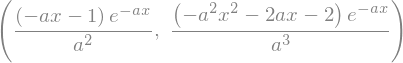

In [23]:
x = symbols('x'); a = symbols('a', positive=True)
integrate(x*exp(-a*x), x), integrate(x**2*exp(-a*x), x)

Assim 
\begin{align}
\int_{0}^{r_{1}}dr_{2}r_{2}^{2}e^{-4r_{2}/a_{0}} & = \Big[-\frac{a_{0}}{4}\Big(r_{2}^{2} +\frac{2a_{0}}{4}\Big(r_{2}+\frac{a_{0}}{4}\Big)\Big)e^{-4r_{2}/a_{0}}\Big]_{0}^{r_{1}} \\
& = -\frac{a_{0}}{4}\Big(r_{1}^{2} +\frac{2a_{0}}{4}\Big(r_{1}+\frac{a_{0}}{4}\Big)\Big)e^{-4r_{1}/a_{0}} + \frac{a_{0}}{4}\Big(0^{2} +\frac{2a_{0}}{4}\Big(0+\frac{a_{0}}{4}\Big)\Big)e^{-40/a_{0}} \\
& = -\frac{a_{0}}{4}\Big(r_{1}^{2} +\frac{a_{0}}{2}\Big(r_{1}+\frac{a_{0}}{4}\Big)\Big)e^{-4r_{1}/a_{0}} + \frac{a_{0}^{3}}{32}
\end{align}
e 
\begin{align}
\int_{r_{1}}^{\infty}dr_{2}r_{2}e^{-4r_{2}/a_{0}} & = \Big[ -\frac{a_{0}}{4}\Big(r_{2}+\frac{a_{0}}{4}\Big)e^{-4r_{2}/a_{0}}\Big]_{r_{1}}^{\infty} \\
& = 0 + \frac{a_{0}}{4}\Big(r_{1}+\frac{a_{0}}{4}\Big)e^{-4r_{1}/a_{0}}.
\end{align}
Por conseguinte
\begin{align}
\int d^{3}r_{2} \frac{e^{-4r_{2}/a_{0}}}{||\vec{r}_{1}-\vec{r}_{2}||} & = \frac{4\pi}{r_{1}}\Big( -\frac{a_{0}}{4}\Big(r_{1}^{2} +\frac{a_{0}}{2}\Big(r_{1}+\frac{a_{0}}{4}\Big)\Big)e^{-4r_{1}/a_{0}} + \frac{a_{0}^{3}}{32} + r_{1}\frac{a_{0}}{4}\Big(r_{1}+\frac{a_{0}}{4}\Big)e^{-4r_{1}/a_{0}} \Big) \\
& = \frac{\pi a_{0}^{3}}{8r_{1}}\Big(1 -\frac{32}{a_{0}^{3}}\frac{a_{0}}{4}\Big(r_{1}^{2} +\frac{a_{0}}{2}\Big(r_{1}+\frac{a_{0}}{4}\Big)-r_{1}^{2} - \frac{a_{0}r_{1}}{4}\Big)e^{-4r_{1}/a_{0}} \Big) \\
& = \frac{\pi a_{0}^{3}}{8r_{1}}\Big(1 -\frac{8}{a_{0}^{2}}\frac{a_{0}}{2}\Big(\frac{r_{1}}{2}+\frac{a_{0}}{4}\Big)e^{-4r_{1}/a_{0}} \Big) \\
& = \frac{\pi a_{0}^{3}}{8r_{1}}\Big(1 -\Big(\frac{2r_{1}}{a_{0}}+1\Big)e^{-4r_{1}/a_{0}} \Big).
\end{align}

Com isso, podemos voltar ao cálculo do valor médio da interação elétron-elétron
\begin{align}
\langle U_{ee}\rangle & = ke^{2}\Big(\frac{8}{\pi a_{0}^{3}}\Big)^{2}\int d^{3}r_{1}e^{-4r_{1}/a_{0}}\frac{\pi a_{0}^{3}}{8r_{1}}\Big(1 -\Big(\frac{2r_{1}}{a_{0}}+1\Big)e^{-4r_{1}/a_{0}} \Big) \\
& = ke^{2}\frac{8}{\pi a_{0}^{3}}\int_{0}^{2\pi}d\phi_{1}\int_{0}^{\pi}\sin\theta_{1}d\theta_{1}\int_{0}^{\infty}r_{1}^{2}dr_{1}e^{-4r_{1}/a_{0}}\frac{1}{r_{1}}\Big(1 -\Big(\frac{2r_{1}}{a_{0}}+1\Big)e^{-4r_{1}/a_{0}} \Big) \\
& = ke^{2}\frac{8}{\pi a_{0}^{3}}4\pi\int_{0}^{\infty}dr_{1}\Big(r_{1}e^{-4r_{1}/a_{0}} -\Big(\frac{2r_{1}^{2}}{a_{0}}+r_{1}\Big)e^{-8r_{1}/a_{0}} \Big) \\
& = \frac{32ke^{2}}{a_{0}^{3}}\Big(\Big[-\frac{a_{0}}{4}\Big(r_{1}+\frac{a_{0}}{4}\Big)e^{-4r_{1}/a_{0}}\Big]_{0}^{\infty} -\frac{2}{a_{0}}\Big[-\frac{a_{0}}{8}\Big(r_{1}^{2} +\frac{2a_{0}}{8}\Big(r_{1}+\frac{a_{0}}{8}\Big)\Big)e^{-8r_{1}/a_{0}}\Big]_{0}^{\infty} \\
& \hspace{2.2cm} - \Big[-\frac{a_{0}}{8}\Big(r_{1}+\frac{a_{0}}{8}\Big)e^{-8r_{1}/a_{0}}\Big]_{0}^{\infty}\Big) \\
& = \frac{2^{5}ke^{2}}{a_{0}^{3}}\Big(0+\frac{a_{0}^{2}}{2^{4}} -\frac{2}{a_{0}}\Big(0+\frac{a_{0}^{3}}{2^{8}}\Big) - \Big(0+\frac{a_{0}^{2}}{2^{6}}\Big)\Big) \\
& = \frac{2^{5}ke^{2}}{a_{0}}\frac{2^{3}-1-2^{1}}{2^{7}}  = \frac{5ke^{2}}{4a_{0}} \\
& \approx 34.01 \text{ eV}.
\end{align}

In [28]:
((5*k*e**2)/(4*a0))/e, -108.85+34.01

Com isso, temos que o limite superior para a energia do estado fundamental do átomo de Hélio estimada usando como função de onda teste o produto das funções de onda dos elétrons independentes:
$$\langle H\rangle_{\phi} \approx -108.85\text{ eV} + 34.01 \text{ eV} = -74.84\text{ eV},$$
que está razoavelmente próximo do valor experimental, que é $E_{0}^{exp} \approx -78.935\text{ eV}.$

Podemos, claro, melhorar este resultado. Notemos que ainda não fizemos nenhuma optimização sobre parâmetros variacionais. Uma dica sobre que parâmetro é esse pode ser obtida notando-se que estamos usando uma "imagem" clássica de elétrons pontuais, quando na verdade eles são objetos quânticos espalhados no espaço. Esse espraiamento faz com que um elétron blinde o núcleo, fazendo com que o outro elétron interaja efetivamente com menos que $Z$ prótons. Para incluir esse efeito, vamos usar a função de onda teste
\begin{align}
\phi & = \psi_{1,0,0}(r_{1},\theta_{1},\phi_{1})\psi_{1,0,0}(r_{2},\theta_{2},\phi_{2}) \\
& = \left(\frac{Z}{\pi a_{0}}\right)^{3}e^{-Z(r_{1}+r_{2})/a_{0}} = \phi(r_{1},r_{2},Z).
\end{align}
Como no método variacional não modificamos o Hamiltoniano do sistema, para utilizar os resultados conhecidos, vamos reescrever o Hamiltoniano do átomo de Hélio como segue
$$H = -\frac{\hbar^{2}}{2m_{e}}\big(\nabla_{1}^{2}+\nabla_{2}^{2}\big)-ke^{2}\Big(\frac{Z}{r_{1}}+\frac{Z}{r_{2}}\Big) + ke^{2}\Big(\frac{Z-2}{r_{1}}+\frac{Z-2}{r_{2}}+\frac{1}{||\vec{r}_{1}-\vec{r}_{2}||}\Big). \hspace{1cm} (\star)$$

Os 2 primeiros termos correspondem à soma de Hamiltonianos de 2 átomos hidrogenóides com nº atômico $Z$. Assim, pela forma da função de onda teste, pode-se verificar que
\begin{align}
\langle H\rangle_{\phi} & = 2E_{1}^{(0)} + 2ke^{2}(Z-2)\Big\langle\frac{1}{r}\Big\rangle_{\psi_{100}} + \langle U_{ee}\rangle_{\phi} \\
& = 2Z^{2}E_{1}^{(0)} + 2ke^{2}(Z-2)\frac{Z}{a_{0}} + \frac{Z}{2}\frac{5ke^{2}}{4a_{0}} \\
& = 2Z^{2}E_{1}^{(0)} + 4(Z^{2}-2Z)\frac{ke^{2}}{2a_{0}} + \frac{5Z}{4}\frac{ke^{2}}{2a_{0}} \\
& = \Big(2Z^{2} - 4(Z^{2}-2Z) - \frac{5Z}{4}\Big)E_{1}^{(0)} \\
& = \Big(-2Z^{2} + (8-5/4)Z\Big)E_{1}^{(0)}.
\end{align}

Obtemos o parâmetro variacional ótimo de
\begin{align}
& \partial_{Z}\langle H\rangle_{\phi} = 0 \ \therefore\ -4Z+(8-5/4)=0 \\
& \therefore\ Z = \frac{8-5/4}{4} = 1.6875.
\end{align}

Usando este valor de $Z$, teremos a seguinte estimativa variacional para a energia do estado fundamental do átomo de Hélio:
$$\langle H\rangle_{\phi} \approx -77.49\text{ eV},$$
que está ainda mais próxima do valor experimental $E_{0}^{exp} \approx -78.935\text{ eV}.$

In [41]:
Z = (8-5/4)/4; Z

In [44]:
(-2*Z**2 + (8-5/4)*Z)*E10

# Exercícios

1. Utilize o método variacional para estimar a energia do estado fundamental do oscilador harmônico quântico unidimensional usando como função de onda teste
$$\phi(x,b) = \frac{A}{x^{2}+b^{2}}.$$

1. Normalize a função de onda $$\phi_{1}(x) = Axe^{-bx^{2}}$$ para obter $$A = \sqrt{\frac{2^{3}b^{3/2}}{\sqrt{2\pi}}}.$$

1. Use o método variacional para obter um limite superior para $E_{2}$, a energia do 2º estado excitado. Especifique que propriedades a função de onda deve ter.

1. Verifique que
$$\langle\phi|P^{2}X^{2}|\phi\rangle = \int dx\phi(x)^{*}\big(-i\hbar\partial_{x}\big)^{2}\big(x^{2}\phi(x)\big).$$